In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data

In [ ]:
# for simple regression
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [ ]:
## For multiple regression
# x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
# y = [4, 5, 20, 14, 32, 22, 38, 43]
# x, y = np.array(x), np.array(y)

Fit

In [ ]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [ ]:
# Pay attention to the unusual order of y, x. 
mod_fit = sm.OLS(y, sm.add_constant(x)).fit()
print(mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     10.08
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0337
Time:                        19:19:29   Log-Likelihood:                -19.071
No. Observations:                   6   AIC:                             42.14
Df Residuals:                       4   BIC:                             41.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6333      5.872      0.959      0.3

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


Extractions

In [ ]:
res = mod_fit.resid # residuals
res

array([-3.33333333,  6.26666667, -5.13333333,  7.46666667, -7.93333333,
        2.66666667])

In [ ]:
mod_fit.params

array([5.63333333, 0.54      ])

In [ ]:
# Figure rectangle sizes
plt.rcParams['figure.figsize'] = [4, 2]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Text(0, 0.5, 'residuals')

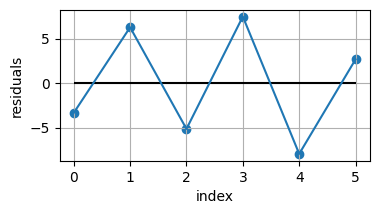

In [ ]:
plt.plot(range(len(res)), res)
plt.scatter(range(len(res)), res)
plt.grid()
plt.hlines(0, 0, len(res)-1)
# plt.title("Residuals vs index diagnostic plot")
plt.xlabel("index")
plt.ylabel("residuals")


Text(0, 0.5, 'Residual frequency')

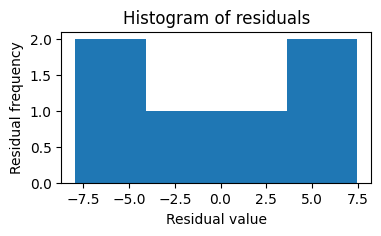

In [ ]:
plt.hist(res, bins=4)
plt.title("Histogram of residuals")
plt.xlabel("Residual value")
plt.ylabel("Residual frequency")

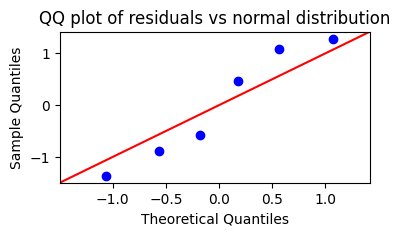

In [ ]:
# Against normal:
fig = sm.qqplot(res, stats.norm, fit=True, line="45")
plt.title("QQ plot of residuals vs normal distribution")
plt.show()



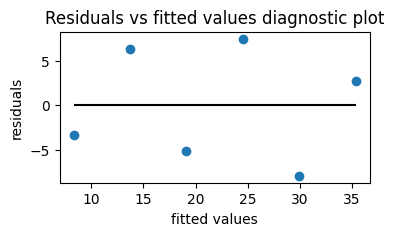

In [ ]:
fitted = mod_fit.fittedvalues
res = mod_fit.resid
plt.scatter(x=fitted, y=res)
plt.hlines(y=0, xmin=min(fitted), xmax=max(fitted))
plt.title("Residuals vs fitted values diagnostic plot")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()


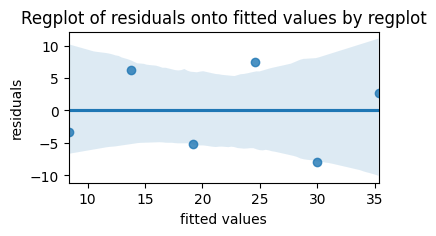

In [ ]:
import seaborn as sns
sns.regplot(x=fitted, y=res)
plt.title("Regression residuals onto fitted values by regplot")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()

Same as above, but by a different function

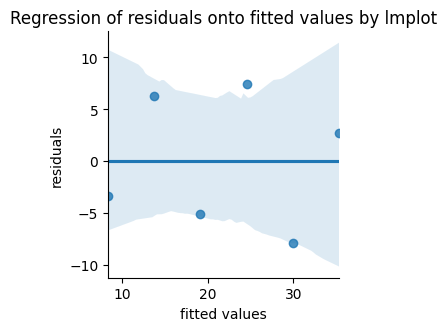

In [ ]:
import pandas as pd
df = pd.DataFrame({"fitted": fitted, "res": res})
sns.lmplot(x="fitted", y="res", data=df, height=3)
plt.title("Regression of residuals onto fitted values by lmplot")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()